Workgroup 2

# Potential Outcomes and RCTs

#### Group 3: Dube, V., Garay, E. Guerrero, J., Villalba, M.

## Multicolinearity

What is Multicollinearity?

In [ ]:
# Example

## Analyzing RCT data with precision adjustment

## A crash course in good and bad controls

In this section, we will explore different scenarios where we need to decide whether the inclusion of a control variable, denoted by _Z_, will help (or not) to improve the estimation of the **average treatment effect** (ATE) of treatment _X_ on outcome _Y_. The effect of observed variables will be represented by a continuous line, while that of unobserved variables will be represented by and discontinuous line.

In [4]:
# Libraries
import pandas as pd, numpy as np, statsmodels.formula.api as smf
from causalgraphicalmodels import CausalGraphicalModel
from statsmodels.iolib.summary2 import summary_col

#### Good control (Blocking back-door paths)

**Model 1** 

We will assume that _X_ measures whether or not the student attends the extra tutoring session, that affects the student's grade (_Y_). Then, we have another observable variable, as hours of the student sleep (_Z_), that impacts _X_ and _Y_. Theory says that when controlling by _Z_, we block the back-door path from _X_ to _Y_. Thus, we see that in the second regression, the coefficient of _X_ is closer to the real one (2.9898 ≈ 3).

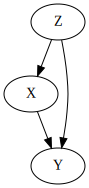

In [5]:
sprinkler = CausalGraphicalModel(nodes=["Z","Y","X"],
                                 edges=[("X","Y"),
                                        ("Z","X"),
                                        ("Z","Y")])
sprinkler.draw()

In [6]:
np.random.seed(24) # set seed

# Generate data
n = 1000 # sample size
Z = np.random.normal(0,1, 1000).reshape((1000, 1))
X = 5 * Z + np.random.normal(0, 1, 1000).reshape((1000, 1))
Y = 3 * X + 1.5 * Z + np.random.normal(0, 1, 1000).reshape((1000, 1))

# Create dataframe
D = np.hstack((Z, X, Y))
data = pd.DataFrame(D, columns = ["Z", "X", "Y"])

In [7]:
# Regressions
no_control = smf.ols("Y ~ X", data=data).fit()        # Wrong, not controlling by the confounder Z
using_control = smf.ols("Y ~ X + Z", data=data).fit() # Correct

# Summary results
dfoutput = summary_col([no_control, using_control], stars=True)
print(dfoutput)

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.

                  Y I       Y II  
----------------------------------
Intercept      -0.0121   -0.0283  
               (0.0322)  (0.0306) 
R-squared      0.9964    0.9967   
R-squared Adj. 0.9964    0.9967   
X              3.2928*** 2.9643***
               (0.0063)  (0.0315) 
Z                        1.6891***
                         (0.1590) 
Standard errors in parentheses.
* p<.1, ** p<.05, ***p<.01


**Model 2** 

We will assume that _X_ stands for the police salaries that affect the crime rate (_Y_). Then, we have another observable variable, as the policemen's supply (_Z_), that impacts _X_ but not _Y_. And, additionally, we know that there is an unobservable variable (denoted by a _•_), as the preference for maintaining civil order, that affects _Z_ and _Y_. The theory says that when controlling by _Z_, we block (some) of the unobservable variable’s back-door path from _X_ to _Y_. Thus, we see that in the second regression, the coefficient of _X_ is equal to the real one (0.5).

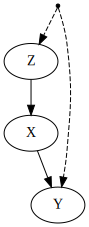

In [8]:
sprinkler = CausalGraphicalModel(nodes=["Z","Y","X"],
                                 edges=[("Z","X"),
                                        ("X","Y")],
                                 latent_edges=[("Z","Y")])
sprinkler.draw()

In [9]:
np.random.seed(24) # set seed

n = 1000
U = np.random.normal(0, 1, 1000).reshape((1000, 1))
Z = 7 * U + np.random.normal(0, 1, 1000).reshape((1000, 1))
X = 2 * Z + np.random.normal(0, 1, 1000).reshape((1000, 1))
Y = 0.5 * X + 0.2 * U + np.random.normal(0, 1, 1000).reshape((1000, 1))

# Create dataframe
D = np.hstack((U, Z, X, Y))
data = pd.DataFrame(D, columns = ["U", "Z", "X", "Y"])

In [10]:
# Regressions
no_control = smf.ols("Y ~ X", data=data).fit()
using_control = smf.ols("Y ~ X + Z", data=data).fit()

# Summary results
dfoutput = summary_col([no_control,using_control], stars=True)
print(dfoutput)

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.

                  Y I       Y II  
----------------------------------
Intercept      -0.0003   -0.0006  
               (0.0312)  (0.0312) 
R-squared      0.9820    0.9820   
R-squared Adj. 0.9820    0.9820   
X              0.5104*** 0.5000***
               (0.0022)  (0.0323) 
Z                        0.0209   
                         (0.0649) 
Standard errors in parentheses.
* p<.1, ** p<.05, ***p<.01


#### Bad Control (M-bias)

**Model 7** 

Let us suppose that _X_ stands for a job training program aimed at reducing unemployment. Then, there is a first unobserved confounder, which could be the planning effort and good design of the job program (right _•_) that impacts directly on the participation in job training programs (_X_) and the proximity of job programs (that would be the bad control _Z_). Furthermore, we have another unobserved confounder (left _•_), as the soft skills of the unemployed, that affects the employment status of individuals (_Y_) and the likelihood of beeing in a job training program that is closer (_Z_). That is why including _Z_ in the second regression makes _X_ coefficient value further to the real one.

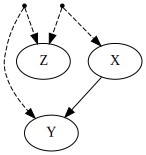

In [11]:
sprinkler = CausalGraphicalModel(nodes=["Z","Y","X"],
                                 edges=[("X","Y")],
                                 latent_edges=[("X","Z"),("Z","Y")]
                                )
sprinkler.draw()

In [12]:
np.random.seed(24) # set seed

n = 1000
U_1 = np.random.normal(0, 1, 1000).reshape((1000, 1))
U_2 = np.random.normal(0, 1, 1000).reshape((1000, 1))

Z = 0.3 * U_1 + 0.9 * U_2 + np.random.normal(0, 1, 1000).reshape((1000, 1)) # generate Z
X = 4 * U_1 + np.random.normal(0, 1, 1000).reshape((1000, 1))
Y = 3 * X + U_2 + np.random.normal(0, 1, 1000).reshape((1000, 1))

# Create dataframe
D = np.hstack((U_1, U_2, Z, X, Y))
data = pd.DataFrame(D, columns = ["U_1", "U_2", "Z", "X", "Y"])

In [13]:
# Regressions
no_control = smf.ols("Y ~ X", data=data).fit()
using_control = smf.ols("Y ~ X + Z", data=data).fit()

# Summary results
dfoutput = summary_col([no_control, using_control], stars=True)
print(dfoutput)

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.

                  Y I       Y II  
----------------------------------
Intercept      -0.0549   -0.0251  
               (0.0422)  (0.0384) 
R-squared      0.9884    0.9904   
R-squared Adj. 0.9884    0.9904   
X              2.9879*** 2.9596***
               (0.0102)  (0.0095) 
Z                        0.4349***
                         (0.0300) 
Standard errors in parentheses.
* p<.1, ** p<.05, ***p<.01


#### Neutral Control (possibly good for precision)

**Model 8** 

In this scenario, we will assume that _X_ represents the implementation of a new government policy to provide subsidies and guidance for small companies. There is another variable, _Z_, that stands for the % inflation rate. And both _X_ and _Z_ affect _Y_, which represents the GDP growth rate of the country. Then, even if _Z_ does not impact _X_, its inclusion improves the precision of the ATE estimator (8.5643 is closer to 8.6).

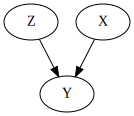

In [14]:
sprinkler = CausalGraphicalModel(nodes=["Z","Y","X"],
                                 edges=[("Z","Y"),("X","Y")])
sprinkler.draw()

In [15]:
np.random.seed(24) # set seed

n = 1000

Z = np.random.normal(0, 1, 1000).reshape((1000, 1))
X = np.random.normal(0, 1, 1000).reshape((1000, 1))
Y = 8.6 * X + 5 * Z + np.random.normal(0, 1, 1000).reshape((1000, 1))

# Create dataframe
D = np.hstack((Z, X, Y))
data = pd.DataFrame(D, columns = ["Z", "X", "Y"])

In [16]:
# Regressions
no_control = smf.ols("Y ~ X", data=data).fit()
using_control = smf.ols("Y ~ X + Z", data=data).fit()

# Summary results
dfoutput = summary_col([no_control, using_control], stars=True)
print(dfoutput)

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.

                  Y I       Y II  
----------------------------------
Intercept      0.0289    -0.0283  
               (0.1636)  (0.0306) 
R-squared      0.7109    0.9899   
R-squared Adj. 0.7107    0.9899   
X              8.3355*** 8.5643***
               (0.1682)  (0.0315) 
Z                        5.0108***
                         (0.0302) 
Standard errors in parentheses.
* p<.1, ** p<.05, ***p<.01


#### Bad Controls (Bias amplification)

**Model 10** 

Let us assume that _X_ measures the implementation of a housing program for young adults buying their first house, which impacts the average housing prices (_Y_). There is another observable variable, _Z_, that measures the expenditure of the program and affects only _X_. Also, there is an unobservable variable (represented by a •) that represents the preference of young adults to move from their parent's house and impacts only _X_ and _Y_. Therefore, the inclusion of _Z_ will "amplify the bias" of (•) on _X_, so the ATE estimator will be worse. We can see that in the second regression, the estimator (0.8241) is much farther from the real value (0.8).

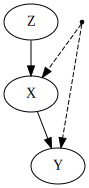

In [17]:
sprinkler = CausalGraphicalModel(nodes=["Z", "Y", "X"],
                                 edges=[("Z", "X"), ("X", "Y")],
                                 latent_edges=[("X", "Y")])
sprinkler.draw()

In [18]:
np.random.seed(24) # set seed

n = 1000
U = np.random.normal(0, 1, 1000).reshape((1000, 1))
Z = np.random.normal(0, 1, 1000).reshape((1000, 1))
X = 3 * Z + 6 * U + np.random.normal(0, 1, 1000).reshape((1000, 1))
Y = 0.8 * X + 0.2 * U + np.random.normal(0, 1, 1000).reshape((1000, 1))

# Create dataframe
D = np.hstack((U, Z, X, Y))
data = pd.DataFrame(D, columns = ["U", "Z", "X", "Y"])

In [19]:
# Regressions
no_control = smf.ols("Y ~ X" , data=data).fit()
using_control = smf.ols("Y ~ X + Z" , data=data).fit()

# Summary results
print(summary_col([no_control, using_control], stars=True))

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.

                  Y I       Y II  
----------------------------------
Intercept      0.0021    -0.0013  
               (0.0313)  (0.0312) 
R-squared      0.9686    0.9687   
R-squared Adj. 0.9685    0.9687   
X              0.8195*** 0.8241***
               (0.0047)  (0.0051) 
Z                        -0.0812**
                         (0.0349) 
Standard errors in parentheses.
* p<.1, ** p<.05, ***p<.01
